<a href="https://colab.research.google.com/github/ChabiMax/author_network/blob/main/Main%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests as req
import networkx as nx
import numpy as np
from tqdm import *
import matplotlib.pyplot as plt

git_url = "https://raw.githubusercontent.com/ChabiMax/author_network/main/Data/"

edge_table = pd.read_csv(git_url + 'edge_table.csv')
node_table = pd.read_csv(git_url + 'node_table.csv')


In [2]:
node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_table = node_table.dropna()

density_list = {}
for année in tqdm_notebook(reversed(range(1000, 2025, 5))) :
  BOOL = (node_table.date_naissance < année) & (node_table.date_mort > année)
  id_subset = node_table[BOOL]['Id']
  if len(id_subset) > 10 :
    try :
      graph = nx.from_pandas_edgelist(edge_table[edge_table['source'].isin(id_subset)], source = 'source', target = 'target')
      directed_graph = nx.from_pandas_edgelist(edge_table[edge_table['source'].isin(id_subset)], source = 'source', target = 'target', create_using=nx.DiGraph())
      graph_connected_components = sorted(nx.connected_components(graph), key=len, reverse=True)
      graph_giant = graph.subgraph(graph_connected_components[0])
      density_list[année] = {'density_directed' : nx.density(directed_graph), 
                             'density_undirected' : nx.density(graph),
                             'density_giant' : nx.density(graph_giant),
                             'average_clustering' : nx.average_clustering(graph_giant),
                             'transitivity' : nx.transitivity(graph)}
    except : 
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0it [00:00, ?it/s]

In [3]:
annee_data = pd.DataFrame(density_list).T
annee_data['annee'] = annee_data.index

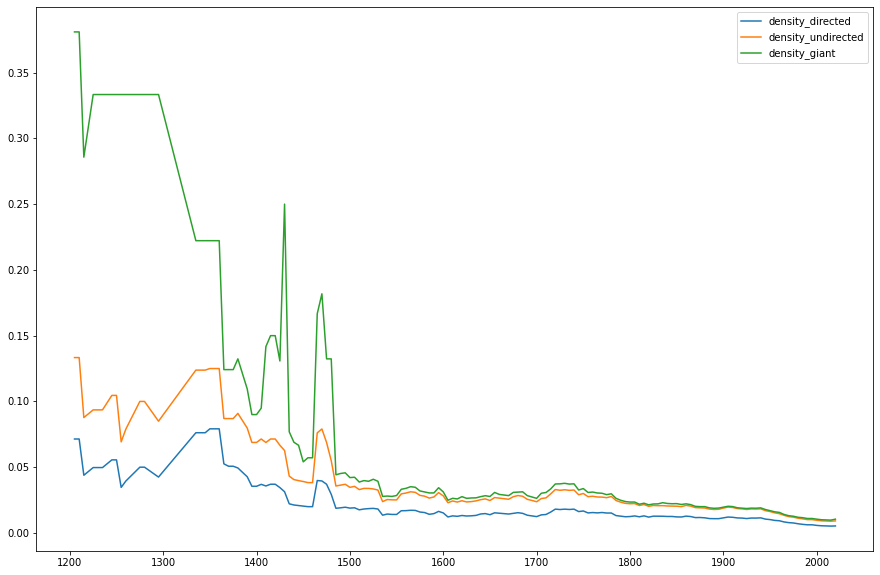

In [4]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['density_directed'], label = 'density_directed')
plt.plot(annee_data['annee'], annee_data['density_undirected'], label = 'density_undirected')
plt.plot(annee_data['annee'], annee_data['density_giant'], label = 'density_giant')
plt.legend()
plt.show()


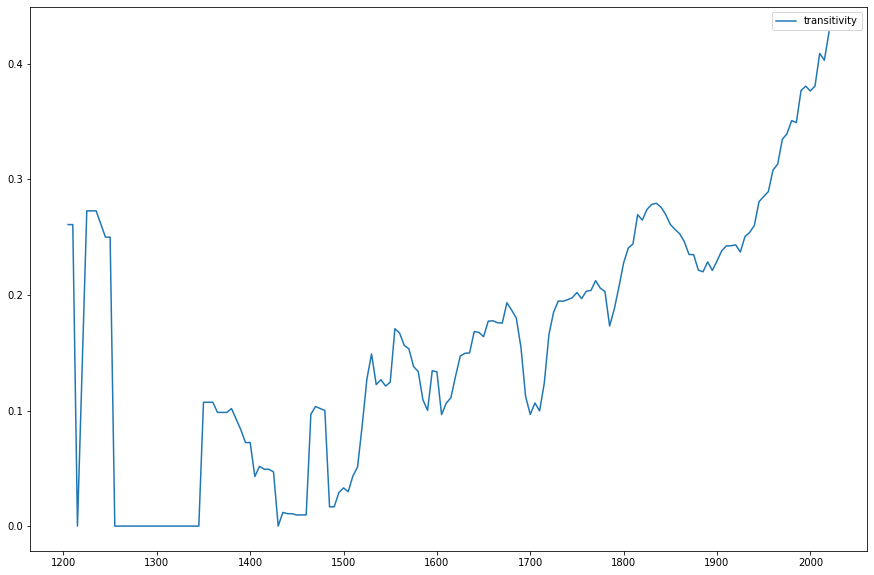

In [7]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['transitivity'], label = 'transitivity')
plt.legend()
plt.show()


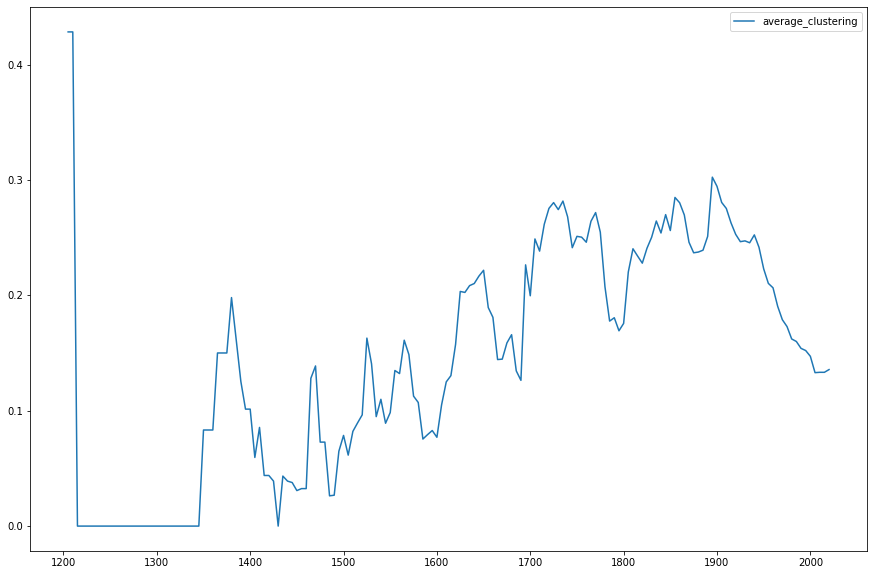

In [8]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['average_clustering'], label = 'average_clustering')
plt.legend()
plt.show()
